This is an example of the blog posts that you'll submit as your primary form of learning demonstration in CSCI 0451. I created this post by modifying the file `posts/example-blog-post/index.ipynb` in VSCode. You can also use JupyterLab for this editing if you prefer. Finally, it is possible to write blog posts without using notebooks by writing `.qmd` files, as illustrated [here](https://quarto.org/docs/get-started/hello/vscode.html). 

# Frontmatter
Under Construction.

```
---
title: My Blog 01 Perceptron 
author: Xianzhi Wang 
date: '2023-02-22'
image: "image.jpg"
description: "a blog about Perceptron algo"
format: html
---
```



# Running Python Code
Under Construction.

To run Python code, place your code in a Python code block inside your notebook. You can run the code block inside VSCode (or JupyterLab) using the keyboard shortcut `ctrl + Enter`. You'll see the result of your computation below the code, including the value of the most recent statement. 

In [1]:
print("you can learn this!")
%load_ext autoreload
%autoreload 2

you can learn this!


We'll have lots of opportunities to make data visualizations in this course. These also display inside the notebook, and get converted into your blog post: 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

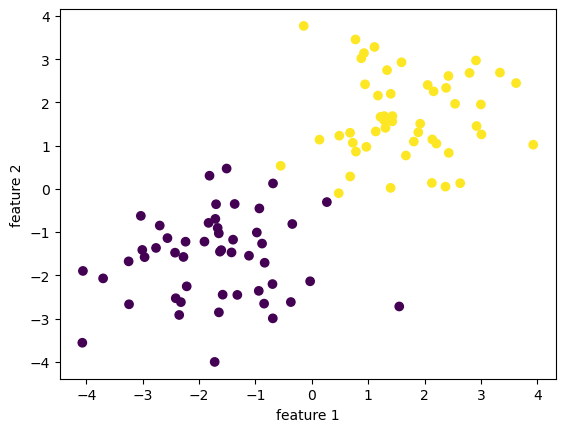

In [3]:
np.random.seed(12345)
n=100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features=p_features-1, centers=[ (-1.7,-1.7), (1.7,1.7) ])

fig=plt.scatter(X[:,0], X[:,1], c=y)
xlab=plt.xlabel("feature 1")
ylab=plt.ylabel("feature 2")



Another thing we'll often do is implement an algorithm in a source file (i.e. a `.py` file) and then *use* it in a notebook. To do this, just place the `.py` file in the same directory as the notebook. For example, the file `source.py` in the same directory contains a custom function (which prints a message). I can use like this: 

In [4]:
import perceptron
from perceptron import Perceptron
import importlib
importlib.reload(perceptron)

<module 'perceptron' from '/Users/xianzhiwang/ml0451/CS0451-page-site/posts/my-blog-post-01/perceptron.py'>

In [27]:
from perceptron import Perceptron
mu, nu = X.shape
W = np.random.randn(mu,nu)
w = W[1,:]
print(w)
history = 2
b = 10
p = Perceptron(history = history, maxiter = 100)
p.fit(X,w,y,b, maxiter=100)

p.myprint()
# print(X)

# print(w)

[ 0.05709373 -0.96217672]
1.0
it's working! OMG!


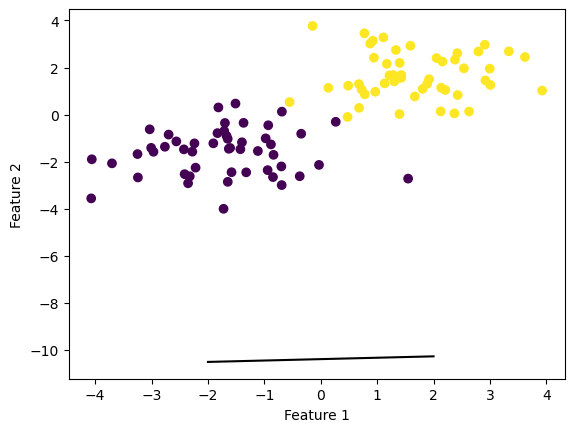

In [28]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

# Markdown

You can use Markdown syntax to write text in Markdown cells. Markdown allows you to create simple text formatting like bullets, italics, and section headers. The Quarto [description of markdown basics](https://quarto.org/docs/authoring/markdown-basics.html) has everything you need to get started. 

## Math

In addition to regular text using the Markdown specification, you can also write mathematics, enclosed between dollar signs. The syntax for writing math is very similar to the syntax used in the $\LaTeX$ markup language. For example, `$f(x) \approx y$` renders to $f(x) \approx y$. To place complex mathematical expressions on their own lines, use double dollar signs. For example, the expression 

`$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2$$` 

renders to: 

$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2\;.$$

Behind the scenes, math is powered by the MathJax engine. For more on how to write math, check this handy [tutorial and quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference). 

In [7]:
print(w)
print(np.size(w))

[ 0.04903625 -1.6677128 ]
2
